# Polynomial Regression

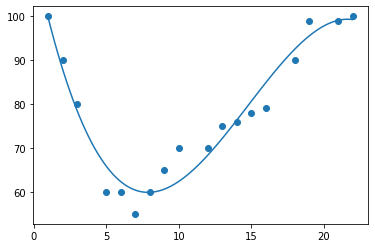

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import random

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [220]:
mymodel

poly1d([-3.03208795e-02,  1.34333191e+00, -1.55383039e+01,  1.13768037e+02])

In [221]:
from sklearn.preprocessing import PolynomialFeatures

In [222]:
X = np.arange(6).reshape(3, 2)

In [223]:
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [224]:
poly = PolynomialFeatures(3)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

# Ridge Regression

In [225]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
import numpy as np

In [226]:
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=25,
    coef=True,
    random_state=1
)

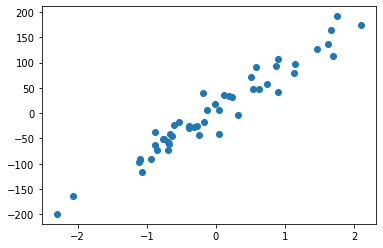

In [227]:
plt.scatter(X, y)

In [228]:
rr = Ridge(alpha=1)
rr.fit(X, y)
w = rr.coef_
w

array([83.16318084])

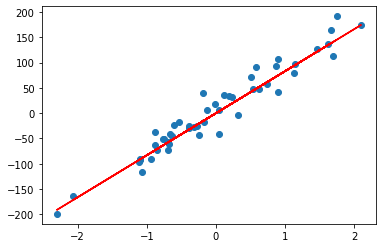

In [229]:
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

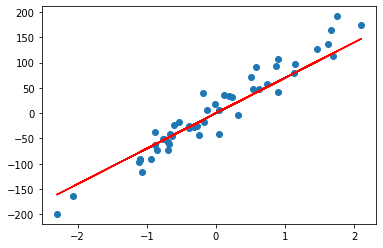

In [230]:
rr = Ridge(alpha=10)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

In [231]:
rr.coef_

array([70.03334293])

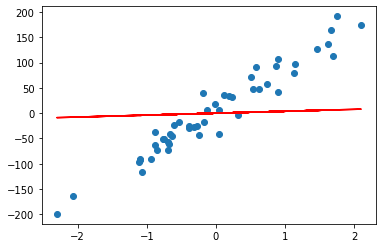

In [232]:
rr = Ridge(alpha=1000)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

In [233]:
rr.coef_

array([3.8130304])

## Implement function
`fit_1d_ridge_regression` that takes two vectors $x$ and $y$ and int lmb, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope using ridge regression matrix form.

$$
    b_{rigde} = (X'X + nI)^{-1}@X'Y
$$

where

$$
    X'X = X @ X^{T}
$$

In [266]:
def fit_1d_ridge_regression(X_t, y_t, lmb=0.01):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    #TODO
    X_t = np.c_[np.ones(len(X_t)), X_t]
#     print(np.linalg.inv(np.dot(X.T, X) + lmb*np.eye(X.shape[1])))
#     print(np.dot(X.T, y))
    inverse_mat = np.linalg.inv(np.dot(X_t.T, X_t) + lmb * np.eye(X_t.shape[1]))
    beta = np.dot(inverse_mat, np.dot(X_t.T, y_t))
#     print()
#                          )
#     beta = np.c_[, beta]
    return beta


def predict(X_t, beta):
    return np.dot(beta[1:], X_t.T) + beta[0]

In [235]:
X.shape, y.shape

((50, 1), (50,))

In [236]:
w = fit_1d_ridge_regression(X, y, 0.01)

In [237]:
w

array([ 5.45955254, 84.91432112])

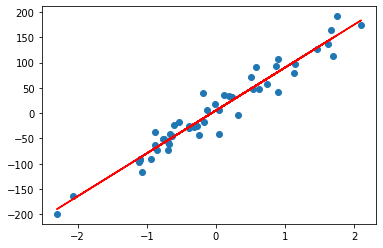

In [238]:
plt.scatter(X, y)
plt.plot(X, w[0]+w[1]*X, c='red')
plt.show()

We have the MSE loss.

$$
    \sum_{n from N}{\frac{1}{2}(y_{n} - y_{pred(n)})^{2}} + l * \sum_{i from P}{|b_{i}|}
$$

If we calculate the partial derivative of the loss w.r.t each b, we get this formula for each data point.

$$
    b_{n} += (y_{i} - BX)*X_{i} + l * lasso(b)
$$

where, we define lasso(x) to be equal to 1 if x is positive, -1 when x is negative and 0 when it is 0(since it does not have derivative at 0)

In [239]:
# absolute value derivative
def defined_abs_der(x):
    x = x.copy()
    x[np.where(x < 0)] = -1
    x[np.where(x > 0)] = 1
    x[np.where(x == 0)] = 0
    return x


def fit_1d_lasso_regression(X_t, y_t, n_iterations=100, lr=0.001, lmb=0.1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """    
    #TODO
    b = np.random.normal(0, 1, X.shape[1])
    b0 = np.random.normal(0, 1, 1)
#     print(b, b0)
    
    for i in range(n_iterations):
        A = np.dot(b, X_t.T) + b0
        
        for j, a in enumerate(A):
            b += lr * ((y_t[j] - a) * X_t[j] + lmb * defined_abs_der(b))
            b0 += lr * ((y_t[j] - a) + lmb * defined_abs_der(b0))
    
    return np.append(b0, b)

In [241]:
fit_1d_lasso_regression(X, y)

array([ 6.35095955, 85.31161003])

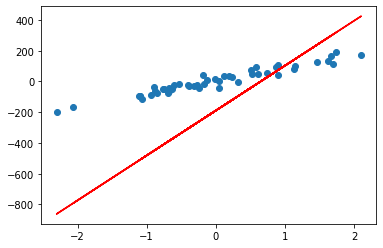

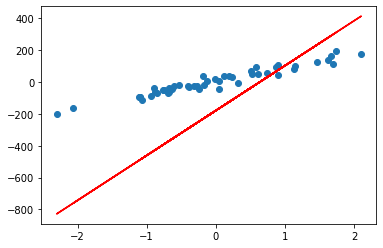

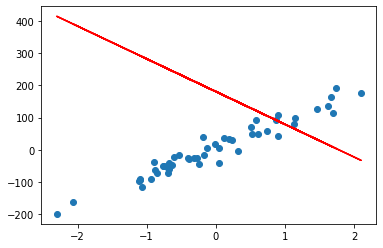

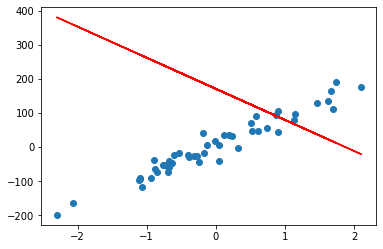

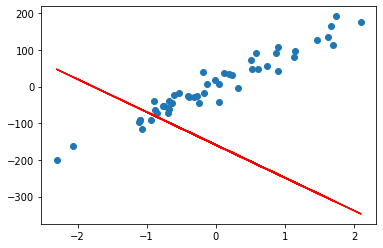

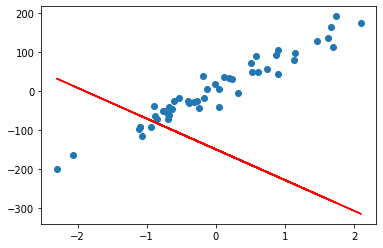

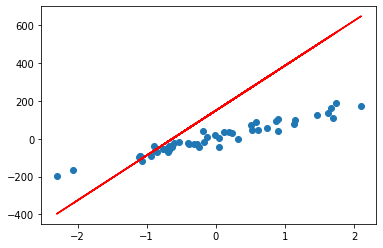

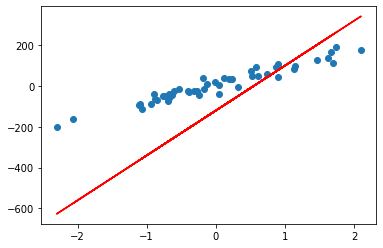

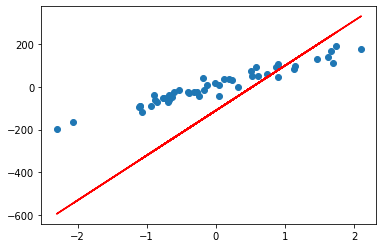

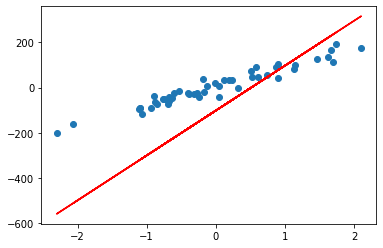

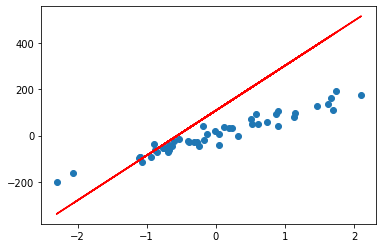

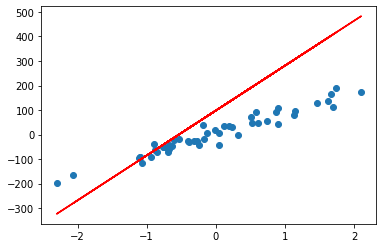

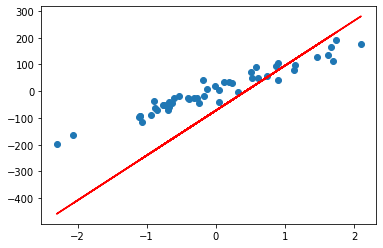

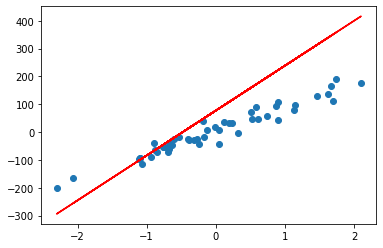

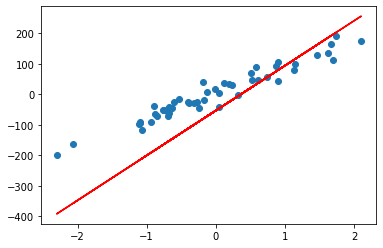

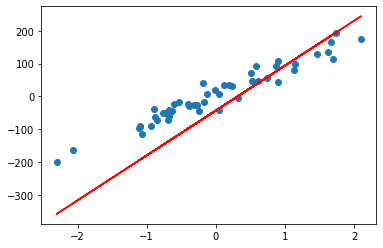

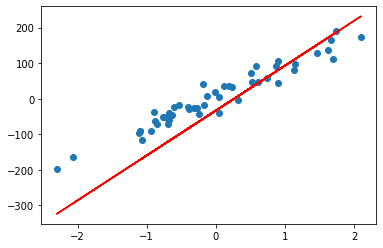

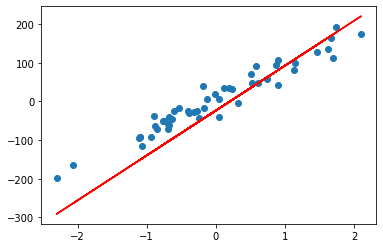

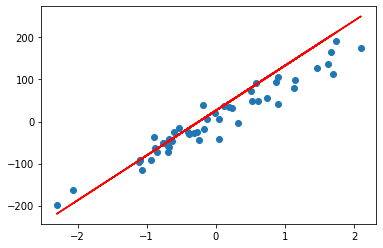

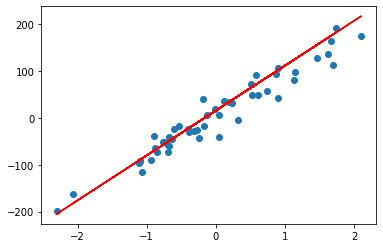

In [242]:
for lmb in range(200, 0, -10):
    w = fit_1d_lasso_regression(X, y, lr=0.01, lmb=lmb)
    plt.scatter(X, y)
    plt.plot(X, w[0]+w[1]*X, c='red')
    plt.show()

## Apply your implemented lasso and ridge regression functions to the data

In [256]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# summarize shape
# print(dataframe.shape)
# summarize first few lines
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [244]:
X = dataframe[dataframe.columns.difference([13])]
y = dataframe[13]

In [259]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:
beta = fit_1d_ridge_regression(X_train, y_train)
beta

array([ 2.97258401e+01, -1.12808363e-01,  3.02048204e-02,  3.97025380e-02,
        2.78024025e+00, -1.68968278e+01,  4.46441788e+00, -6.47115959e-03,
       -1.43988389e+00,  2.60429095e-01, -1.06206395e-02, -9.07378582e-01,
        1.24200142e-02, -5.07648850e-01])

In [270]:
mean_squared_error(y_test, predict(X_test, beta))

24.337193373946228

In [306]:
beta = fit_1d_lasso_regression(X_train.values, y_train.values, n_iterations=10, lr=1e-21, lmb=200)
beta

array([ 0.48760937,  0.30732475,  0.25690683,  0.56810911, -0.69537923,
       -0.68065478, -1.01264397, -0.1310442 , -0.41738073,  0.49811468,
        0.18266594,  0.37561352, -0.56763696,  0.01758624])

In [307]:
mean_squared_error(y_test, predict(X_test, beta))

26320.61521760367

### tunning ridge hyperparametr

In [309]:
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.model_selection import RepeatedKFold
import pandas as pd

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = pd.read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.379
Config: {'alpha': 0.51}


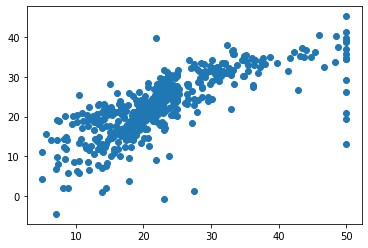

In [310]:
predictions = cross_val_predict(Ridge(alpha=0.51), X, y)
plt.scatter(y, predictions)

## Implement GridSearchCV using numpy 

In [ ]:
import numpy as np

# ___Import Everything you need.
# ___For Example:

from sklearn import metrics
from inspect import signature
from itertools import product
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

class MyGridSearchCV:
    
    def __init__(self, estimator, param_grid: dict, scoring=None, refit=True, cv=None):
        self.estimator = estimator
        self.param_grid = param_grid
        self.scoring = scoring
        self.refit = refit
        if cv is None:
            self.cv = KFold()
        else:
            self.cv = cv
            
            # TODO

    def fit(self, X, y):
        
        X, y = np.array(X), np.array(y)
        
        # TODO
        
        return self

In [ ]:
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = MyGridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
predictions = cross_val_predict(Ridge(alpha=0.51), X, y)
plt.scatter(y, predictions)

In [ ]:
y_pred = results.predict(X)
print('MAE: %.3f' % metrics.mean_absolute_error(y_pred, y))